In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#import csv file and show Top 5 rows
df = pd.read_csv("D:\PORTFOLIO\Supply Chain\Regional_Sales_Data.csv")
df.head()

,OrderNumber,SalesChannelTxt,SalesChannel,WarehouseCode,Warehouse,ProcuredDate,OrderDate,StockTime,ShipDate,ProcessingTime,...,ShippingTime,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 0006891,In-Store,1,WARE-NMK1003,3,10/03/20,12/08/20,155,09/09/20,28,...,9,USD,3,12,153,4,7,0.05,"1,001.18","1,963.10"
1,SO - 0004254,In-Store,1,WARE-NBV1002,2,15/05/19,05/10/19,143,14/10/19,9,...,10,USD,11,41,87,36,3,0.05,"3,348.66","3,939.60"
2,SO - 0007354,Online,2,WARE-UHY1004,4,18/06/20,06/10/20,110,17/10/20,11,...,5,USD,13,37,255,33,7,0.05,781.22,"1,775.50"
3,SO - 0007399,Distributor,3,WARE-NMK1003,3,18/06/20,10/10/20,114,28/10/20,18,...,8,USD,24,26,127,24,7,0.15,"1,464.69","2,324.90"
4,SO - 0001075,In-Store,1,WARE-PUJ1005,5,10/04/18,22/09/18,165,13/10/18,21,...,9,USD,11,27,320,38,6,0.08,"1,476.14","1,822.40"


In [3]:
#explore dataframe shape, structure, check for missing data
df.shape

(7991, 21)

In [4]:
#Search for empty fields
np.sum(df.isna(), axis = 0)

OrderNumber         0
SalesChannelTxt     0
SalesChannel        0
WarehouseCode       0
Warehouse           0
ProcuredDate        0
OrderDate           0
StockTime           0
ShipDate            0
ProcessingTime      0
DeliveryDate        0
ShippingTime        0
CurrencyCode        0
SalesTeamID         0
CustomerID          0
StoreID             0
ProductID           0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   SalesChannelTxt   7991 non-null   object 
 2   SalesChannel      7991 non-null   int64  
 3   WarehouseCode     7991 non-null   object 
 4   Warehouse         7991 non-null   int64  
 5   ProcuredDate      7991 non-null   object 
 6   OrderDate         7991 non-null   object 
 7   StockTime         7991 non-null   int64  
 8   ShipDate          7991 non-null   object 
 9   ProcessingTime    7991 non-null   int64  
 10  DeliveryDate      7991 non-null   object 
 11  ShippingTime      7991 non-null   int64  
 12  CurrencyCode      7991 non-null   object 
 13  SalesTeamID       7991 non-null   int64  
 14  CustomerID        7991 non-null   int64  
 15  StoreID           7991 non-null   int64  
 16  ProductID         7991 non-null   int64  


In [6]:
#Transform Data type from string to float for future calculation
df["Unit Cost"] = [float(str(i).replace(",", "")) for i in df["Unit Cost"]]
df["Unit Price"] = [float(str(i).replace(",", "")) for i in df["Unit Price"]]

In [7]:
#calculate Profit Column
df["Profit"] = df["Unit Price"] - df["Unit Cost"]
df.head()

,OrderNumber,SalesChannelTxt,SalesChannel,WarehouseCode,Warehouse,ProcuredDate,OrderDate,StockTime,ShipDate,ProcessingTime,...,CurrencyCode,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit
0,SO - 0006891,In-Store,1,WARE-NMK1003,3,10/03/20,12/08/20,155,09/09/20,28,...,USD,3,12,153,4,7,0.05,1001.18,1963.1,961.92
1,SO - 0004254,In-Store,1,WARE-NBV1002,2,15/05/19,05/10/19,143,14/10/19,9,...,USD,11,41,87,36,3,0.05,3348.66,3939.6,590.94
2,SO - 0007354,Online,2,WARE-UHY1004,4,18/06/20,06/10/20,110,17/10/20,11,...,USD,13,37,255,33,7,0.05,781.22,1775.5,994.28
3,SO - 0007399,Distributor,3,WARE-NMK1003,3,18/06/20,10/10/20,114,28/10/20,18,...,USD,24,26,127,24,7,0.15,1464.69,2324.9,860.21
4,SO - 0001075,In-Store,1,WARE-PUJ1005,5,10/04/18,22/09/18,165,13/10/18,21,...,USD,11,27,320,38,6,0.08,1476.14,1822.4,346.26


In [8]:
#Verify 
df.dtypes

OrderNumber          object
SalesChannelTxt      object
SalesChannel          int64
WarehouseCode        object
Warehouse             int64
ProcuredDate         object
OrderDate            object
StockTime             int64
ShipDate             object
ProcessingTime        int64
DeliveryDate         object
ShippingTime          int64
CurrencyCode         object
SalesTeamID           int64
CustomerID            int64
StoreID               int64
ProductID             int64
Order Quantity        int64
Discount Applied    float64
Unit Cost           float64
Unit Price          float64
Profit              float64
dtype: object

In [9]:
#Statistical description of numerical fields in the data set
df.describe()

,SalesChannel,Warehouse,StockTime,ProcessingTime,ShippingTime,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,1.982856,3.450882,109.243149,15.168940,5.507571,14.384307,25.457014,183.850081,23.771743,4.525341,0.115649,1431.911513,2284.536504,852.624991
std,1.015687,1.531336,34.371490,7.793951,2.873540,7.986086,14.414883,105.903946,13.526545,2.312631,0.085018,1112.413063,1673.096364,727.763569
min,1.000000,1.000000,31.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000,25.120000
25%,1.000000,3.000000,83.000000,8.000000,3.000000,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,606.120000,1031.800000,335.135000
50%,2.000000,3.000000,108.000000,15.000000,5.000000,14.000000,25.000000,183.000000,24.000000,5.000000,0.080000,1080.580000,1849.200000,601.660000
75%,3.000000,5.000000,135.000000,22.000000,8.000000,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000,1199.435000
max,4.000000,6.000000,189.000000,28.000000,34.000000,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000,3863.220000


To note on the table above: to optimize the supply chain, we are looking at the target values Processing Time and Stock Time in this project.
We can see that there is a wide range in the Stock Time, with the minimum at 31 days and the maximum at 189 days. The Processing Time has a smaller range between 2 to 28 days. 
Mean and Median (50%) are similar in both variables, so we can assume a relatively symmetrical distribution of values.

In [10]:
#Show summary of categorical data fields
df.value_counts(['SalesChannelTxt'])

SalesChannelTxt
In-Store           3298
Online             2425
Distributor        1375
Wholesale           893
Name: count, dtype: int64

In [11]:
df.value_counts(['WarehouseCode'])

WarehouseCode
WARE-NMK1003     2505
WARE-PUJ1005     1451
WARE-UHY1004     1265
WARE-XYS1001     1222
WARE-MKL1006      857
WARE-NBV1002      691
Name: count, dtype: int64

## Data Visualizations

The following visualizations will further explore the data and the relationships between variables. The focus will be on the relationship between Product, Sales Team, Profit and Warehouse with the Processing and Stock Times.

In [12]:
#Creating new column with bins for profit column to allow more comprehensive visualization (0=low profit, 8=high profit)
df['Profit_bin'] = pd.qcut(df['Profit'], q=8, labels=False)
df.tail()

,OrderNumber,SalesChannelTxt,SalesChannel,WarehouseCode,Warehouse,ProcuredDate,OrderDate,StockTime,ShipDate,ProcessingTime,...,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit,Profit_bin
7986,SO - 0004740,Distributor,3,WARE-PUJ1005,5,23/08/19,03/12/19,102,31/12/19,28,...,21,1,298,5,7,0.30,121.94,234.5,112.56,0
7987,SO - 0004230,In-Store,1,WARE-XYS1001,1,15/05/19,02/10/19,140,25/10/19,23,...,8,32,49,33,5,0.40,1921.56,3202.6,1281.04,6
7988,SO - 0004924,In-Store,1,WARE-NBV1002,2,23/08/19,27/12/19,126,17/01/20,21,...,8,37,84,29,2,0.05,2792.76,3825.7,1032.94,5
7989,SO - 0006280,In-Store,1,WARE-MKL1006,6,10/03/20,01/06/20,83,17/06/20,16,...,4,47,342,40,7,0.08,804.00,1072.0,268.00,1
7990,SO - 0007680,Wholesale,4,WARE-XYS1001,1,18/06/20,12/11/20,147,16/11/20,4,...,26,30,10,21,8,0.05,1370.82,2211.0,840.18,4


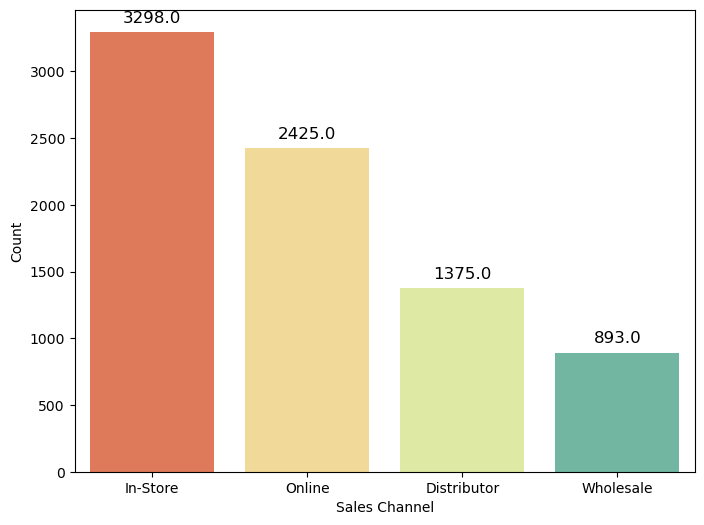

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SalesChannelTxt', data=df, palette='Spectral')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

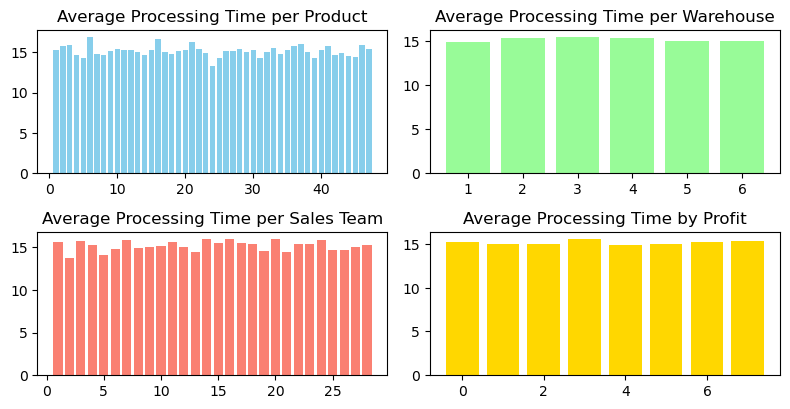

In [14]:
# Plot the average processing time for each product, Sales Team, Profit and Warehouse

plt.figure(figsize=(8,8))


plt.subplot(4, 2, 1)
average_processing_time = df.groupby('ProductID')['ProcessingTime'].mean().reset_index()
plt.bar(average_processing_time['ProductID'], average_processing_time['ProcessingTime'], color='skyblue')
plt.title('Average Processing Time per Product')

plt.subplot(4, 2, 2)
average_processing_time = df.groupby('Warehouse')['ProcessingTime'].mean().reset_index()
plt.bar(average_processing_time['Warehouse'], average_processing_time['ProcessingTime'], color='palegreen')
plt.title('Average Processing Time per Warehouse')

plt.subplot(4, 2, 3)
average_processing_time = df.groupby('SalesTeamID')['ProcessingTime'].mean().reset_index()
plt.bar(average_processing_time['SalesTeamID'], average_processing_time['ProcessingTime'], color='salmon')
plt.title('Average Processing Time per Sales Team')

plt.subplot(4, 2, 4)
average_processing_time = df.groupby('Profit_bin')['ProcessingTime'].mean().reset_index()
plt.bar(average_processing_time['Profit_bin'], average_processing_time['ProcessingTime'], color='gold')
plt.title('Average Processing Time by Profit')

plt.tight_layout()
plt.show()

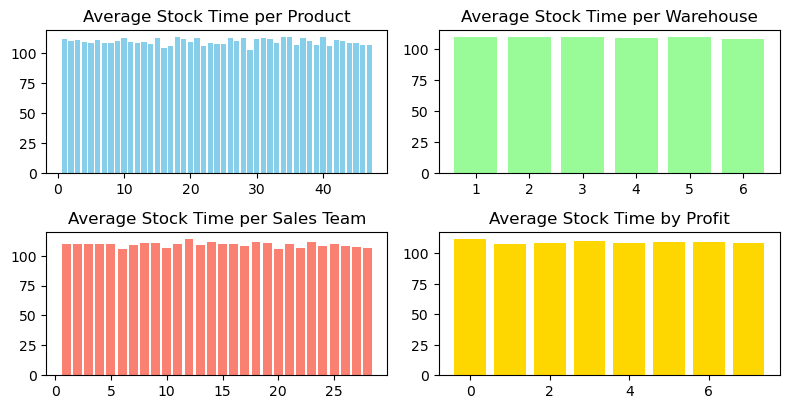

In [15]:
# Plot the average stock time for each product, Sales Team, Profit and Warehouse

plt.figure(figsize=(8,8))


plt.subplot(4, 2, 1)
average_stock_time = df.groupby('ProductID')['StockTime'].mean().reset_index()
plt.bar(average_stock_time['ProductID'], average_stock_time['StockTime'], color='skyblue')
plt.title('Average Stock Time per Product')

plt.subplot(4, 2, 2)
average_stock_time = df.groupby('Warehouse')['StockTime'].mean().reset_index()
plt.bar(average_stock_time['Warehouse'], average_stock_time['StockTime'], color='palegreen')
plt.title('Average Stock Time per Warehouse')

plt.subplot(4, 2, 3)
average_stock_time = df.groupby('SalesTeamID')['StockTime'].mean().reset_index()
plt.bar(average_stock_time['SalesTeamID'], average_stock_time['StockTime'], color='salmon')
plt.title('Average Stock Time per Sales Team')

plt.subplot(4, 2, 4)
average_stock_time = df.groupby('Profit_bin')['StockTime'].mean().reset_index()
plt.bar(average_stock_time['Profit_bin'], average_stock_time['StockTime'], color='gold')
plt.title('Average Stock Time by Profit')

plt.tight_layout()
plt.show()

In [16]:
#Show top 30 lines of dataframe with longest Stock Time
sorted_df = df.sort_values(by='StockTime', ascending=False)
top_30 = sorted_df.head(30)
top_30

,OrderNumber,SalesChannelTxt,SalesChannel,WarehouseCode,Warehouse,ProcuredDate,OrderDate,StockTime,ShipDate,ProcessingTime,...,SalesTeamID,CustomerID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit,Profit_bin
4265,SO - 0007168,Distributor,3,WARE-NMK1003,3,10/03/20,15/09/20,189,04/10/20,19,...,24,29,142,7,1,0.20,1041.98,1929.6,887.62,5
1803,SO - 0002977,Online,2,WARE-NBV1002,2,27/10/18,04/05/19,189,16/05/19,12,...,20,10,65,46,7,0.10,2905.25,3979.8,1074.55,5
5319,SO - 0002163,Online,2,WARE-NMK1003,3,19/07/18,23/01/19,188,07/02/19,15,...,14,5,180,6,7,0.20,495.67,917.9,422.23,2
5661,SO - 0008027,In-Store,1,WARE-NBV1002,2,18/06/20,23/12/20,188,02/01/21,10,...,11,12,67,42,7,0.05,2860.77,3865.9,1005.13,5
4447,SO - 0001252,In-Store,1,WARE-MKL1006,6,10/04/18,15/10/18,188,31/10/18,16,...,3,8,347,12,7,0.05,4143.41,6277.9,2134.49,7
3698,SO - 0004614,Online,2,WARE-PUJ1005,5,15/05/19,19/11/19,188,03/12/19,14,...,13,12,309,32,7,0.10,616.67,1045.2,428.53,2
5274,SO - 0002149,Wholesale,4,WARE-UHY1004,4,19/07/18,22/01/19,187,11/02/19,20,...,25,33,230,26,4,0.10,2724.49,4006.6,1282.11,6
4477,SO - 000403,Online,2,WARE-NMK1003,3,31/12/17,06/07/18,187,01/08/18,26,...,16,14,191,33,8,0.20,515.90,938.0,422.10,2
4051,SO - 0006316,In-Store,1,WARE-XYS1001,1,01/12/19,05/06/20,187,24/06/20,19,...,6,22,22,33,1,0.08,159.19,241.2,82.01,0
1088,SO - 0004589,In-Store,1,WARE-NBV1002,2,15/05/19,17/11/19,186,12/12/19,25,...,5,49,74,19,7,0.05,83.55,194.3,110.75,0


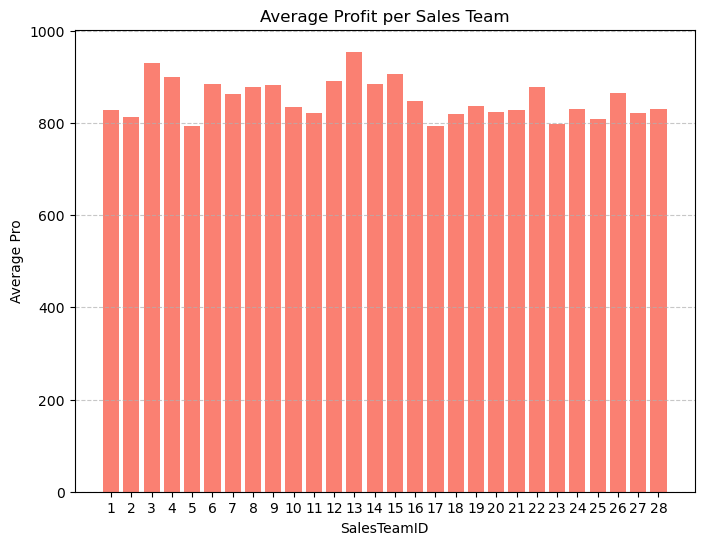

In [17]:
average_profit = df.groupby('SalesTeamID')['Profit'].mean().reset_index()

# Plot the average processing time for each product
plt.figure(figsize=(8, 6))
plt.bar(average_profit['SalesTeamID'], average_profit['Profit'], color='salmon')
plt.xlabel('SalesTeamID')
plt.ylabel('Average Pro')
plt.title('Average Profit per Sales Team')
plt.xticks(average_profit['SalesTeamID'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

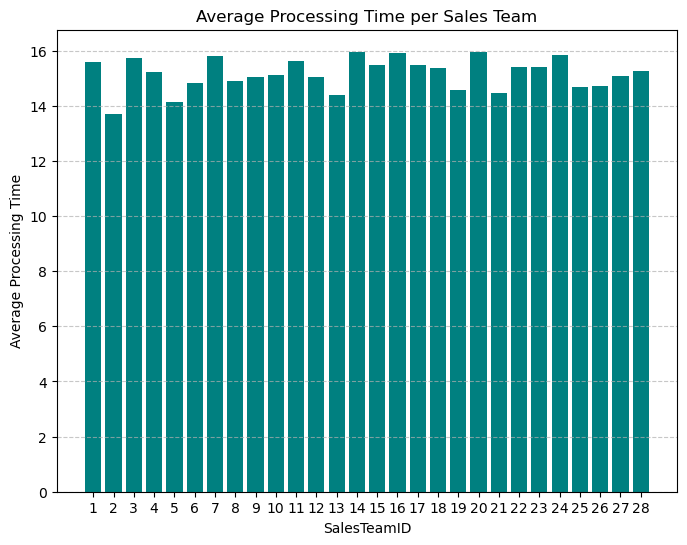

In [18]:
average_processing_time = df.groupby('SalesTeamID')['ProcessingTime'].mean().reset_index()

# Plot the average processing time for each product
plt.figure(figsize=(8, 6))
plt.bar(average_processing_time['SalesTeamID'], average_processing_time['ProcessingTime'], color='teal')
plt.xlabel('SalesTeamID')
plt.ylabel('Average Processing Time')
plt.title('Average Processing Time per Sales Team')
plt.xticks(average_processing_time['SalesTeamID'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The items with the longest processing and stock time are not necessarily the items with the highest profit margin - a further cost analysis is useful to look at this in more depth.
Looking at the Sales Teams, some teams have longer processing times while generating less profit.

## Regression

In the following, linear regression will be applied to try and predict the processing and stock time. This can further help identify patterns and opportunities to optimize the supply chain.

In [20]:
#New dataframe keeping only numerical data for correlation
df_sales=df.drop(['OrderNumber', 'SalesChannelTxt', 'WarehouseCode', 'ProcuredDate', 'OrderDate', 'ShipDate',
     'DeliveryDate',  'CurrencyCode', 'CustomerID'],axis=1)
df_sales.shape

(7991, 14)

In [21]:
df_sales.columns

Index(['SalesChannel', 'Warehouse', 'StockTime', 'ProcessingTime',
       'ShippingTime', 'SalesTeamID', 'StoreID', 'ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'Profit', 'Profit_bin'],
      dtype='object')

In [22]:
#explore correlations 
df_sales.corr()

,SalesChannel,Warehouse,StockTime,ProcessingTime,ShippingTime,SalesTeamID,StoreID,ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit,Profit_bin
SalesChannel,1.000000,-0.000582,-0.014612,0.000303,0.015589,0.929128,-0.002816,0.004224,0.012200,-0.003357,-0.011841,-0.014076,-0.014262,-0.007610
Warehouse,-0.000582,1.000000,-0.007324,-0.002021,-0.008498,-0.012359,0.972534,-0.005937,-0.005754,-0.008011,0.002567,0.009120,0.017042,0.008209
StockTime,-0.014612,-0.007324,1.000000,-0.009300,0.005018,-0.013830,-0.007022,-0.004146,-0.004733,0.002988,-0.010378,-0.011064,-0.009572,-0.011270
ProcessingTime,0.000303,-0.002021,-0.009300,1.000000,-0.004092,0.007014,-0.004682,-0.007569,-0.007098,-0.029986,-0.001045,0.002134,0.006505,0.004500
ShippingTime,0.015589,-0.008498,0.005018,-0.004092,1.000000,0.017486,-0.005685,0.004684,0.003281,-0.005344,-0.001886,-0.004749,-0.008036,-0.007550
SalesTeamID,0.929128,-0.012359,-0.013830,0.007014,0.017486,1.000000,-0.014791,0.001269,0.009241,-0.004381,-0.012914,-0.016550,-0.018309,-0.011645
StoreID,-0.002816,0.972534,-0.007022,-0.004682,-0.005685,-0.014791,1.000000,-0.005283,-0.001096,-0.005296,-0.004297,0.003065,0.013614,0.003729
ProductID,0.004224,-0.005937,-0.004146,-0.007569,0.004684,0.001269,-0.005283,1.000000,0.006514,-0.005198,-0.015540,-0.014132,-0.008736,-0.016712
Order Quantity,0.012200,-0.005754,-0.004733,-0.007098,0.003281,0.009241,-0.001096,0.006514,1.000000,-0.007463,-0.006846,-0.004159,0.000904,0.000916
Discount Applied,-0.003357,-0.008011,0.002988,-0.029986,-0.005344,-0.004381,-0.005296,-0.005198,-0.007463,1.000000,0.003057,0.006140,0.009443,0.002312


In [23]:
#Linear Regression for Processing Time
X=df[['SalesChannel', 'Warehouse', 'StockTime', 'SalesTeamID', 'StoreID', 'ProductID',
       'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price', 'Profit']]

Y=df['ProcessingTime']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
lm = LinearRegression()
lm.fit(X_train_scaled,Y_train)

LinearRegression()

In [26]:
# Evaluate the model on the testing set

Y_pred = lm.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

R-squared: -0.0015981915705229888


In [27]:
#Linear Regression for Stock Time
X=df[['SalesChannel', 'Warehouse', 'ProcessingTime', 'SalesTeamID', 'StoreID', 'ProductID',
       'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price', 'Profit']]

Y=df['StockTime']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lm.fit(X_train_scaled,Y_train)

Y_pred = lm.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

R-squared: -0.004794011317115432


In [28]:
lm.intercept_

109.45682102628285

In [29]:
lm.coef_

array([-1.0926908 ,  0.05337037, -0.22766011,  0.65451755, -0.01942396,
       -0.57502774, -0.25655399,  0.26803558, -0.27963812, -0.27262532,
       -0.19930476])

Model not fitting - need to explore non-linear models (to follow)